# Movie Recommandation system

    The goal of this project to build a Movie Recommandations System, The system will be working on recommanding a movie to the user based on the user's rating, genre of a movie that interest the user, and the timestamp. Providing personlized service to a user results in user satisfaction and successful business.

## Introduction to the data:

    This dataset describes 5-star rating and free-text tagging activity from MovieLens(http://movielens.org), a movie recommendation service. It contains 100836 ratings across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

    Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

    The data are contained in the files `movies.csv`, `ratings.csv`. More details about the contents and use of all these files follows.

    This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.


### Import the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Datasets

> First Dataset is the Movies Dataset: Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:
* movieId
* title
* genres

Genres are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western


In [5]:
# using pd.read_csv() I am loading the movies dataset
# explored the first five rows of my data using .head() method
movies = pd.read_csv(r"C:\Users\mutha\Downloads\ml-latest-small\ml-latest-small\movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


> Second Dataset is the Ratings Dataset: All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
* userId
* movieId
* rating
* timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [6]:
# using pd.read_csv() to load the ratings dataset
# explored the top five rows of my dataset using .head()
ratings = pd.read_csv(r"C:\Users\mutha\Downloads\ml-latest-small\ml-latest-small\ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


> Third Dataset is the tags Dataset: All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:
* userId
* movieId
* tag
* timestamp

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

In [3]:
tags_df = pd.read_csv(r"C:\Users\mutha\Downloads\ml-latest-small\ml-latest-small\tags.csv")
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
tags_df = tags_df.drop(columns=['userId', 'timestamp'])
tags_df.head()

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA


### Merge Datasetes:
    Now I have all of my datasets(movies dataset, ratings dataset and tags dataset) loaded I will go ahead and merge them on to the movie ID using pandas funaction pd.merge(), then print the top five rows to make sure that I have my new data ready to go.

In [11]:
# here I am merging the two datasets
# Next printed the top five rows
df = pd.merge(movies, ratings, on='movieId')
df = pd.merge(df, tags_df, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,pixar


In [12]:
# Calling info() on my data to learn data insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    233213 non-null  int64  
 1   title      233213 non-null  object 
 2   genres     233213 non-null  object 
 3   userId     233213 non-null  int64  
 4   rating     233213 non-null  float64
 5   timestamp  233213 non-null  int64  
 6   tag        233213 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 12.5+ MB


We noticed that the type of 'timestamp' column is 'int64' that's because the time stored as Unix time format, which reflects the number of seconds starting from the date of 01/01/1970 the date where this data started to September 26, 2018 the date where the data where generated. next I will be converting 'timestamp' column to human readable format.

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,movieId,title,genres,userId,rating,timestamp,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,pixar


Next I will extract a year, month and day columns out of timestamps column.

In [16]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df = df.drop(columns=['timestamp'])
df.head()

,movieId,title,genres,userId,rating,tag,year,month,day
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,pixar,2000,7,30
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,pixar,2000,7,30
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,fun,2000,7,30
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,pixar,1996,11,8
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,pixar,1996,11,8


In [17]:
# Calling .describe() to get a summary of the data
df.describe()

,movieId,userId,rating,year,month,day
count,233213.000000,233213.000000,233213.000000,233213.000000,233213.000000,233213.000000
mean,12319.999443,309.688191,3.966535,2007.939660,6.692007,15.954955
std,28243.919401,178.206387,0.968637,7.167815,3.351085,8.898575
min,1.000000,1.000000,0.500000,1996.000000,1.000000,1.000000
25%,296.000000,156.000000,3.500000,2002.000000,4.000000,8.000000
50%,1198.000000,309.000000,4.000000,2008.000000,7.000000,16.000000
75%,4638.000000,460.000000,5.000000,2015.000000,10.000000,24.000000
max,193565.000000,610.000000,5.000000,2018.000000,12.000000,31.000000


In [18]:
# Here I am going to check for missing data using the pandas method .isna() followed by .any()
df.isna().any()

movieId    False
title      False
genres     False
userId     False
rating     False
tag        False
year       False
month      False
day        False
dtype: bool

In [27]:
df.dtypes

movieId      int64
title       object
genres      object
userId       int64
rating     float64
tag         object
year         int32
month        int32
day          int32
dtype: object

#### Movie Rating Distribution

Next I will explore the distribution of Movie Ratings, earlier we mentioned that the ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

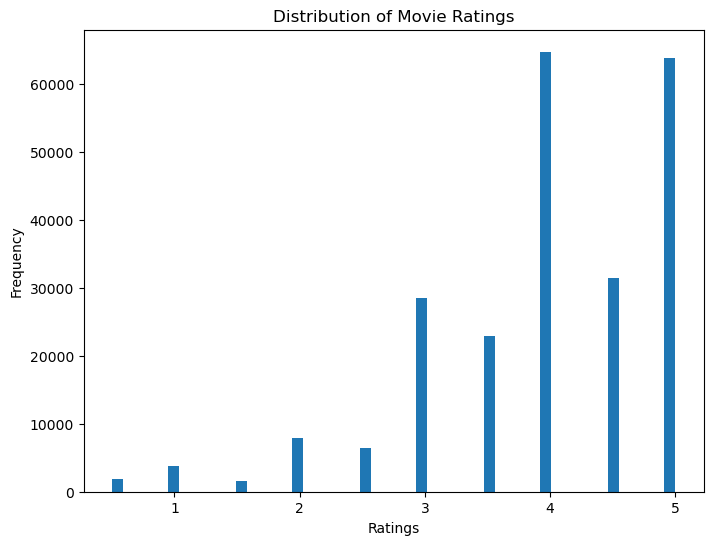

In [28]:
plt.figure(figsize=(8,6))
df['rating'].hist(bins=50)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.grid(False)
plt.show()

In [29]:
file_path = "wrangled_data.csv"
df.to_csv(file_path, index=False)
print(f"DataFrame saved to {file_path}")

DataFrame saved to wrangled_data.csv
